# Part I - (Exploration of Flights Dataset)
## by (Michelle Ezeokeke)

## Introduction
 This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays in the year 2008.


## Table of Contents


A. Preliminary Wrangling

B. Univariate Exploration

C. Bivariate Exploration

D. Multivariate Exploration


## A. Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [2]:
#load datasets into a panda dataframe

df_2008 = pd.read_csv("2008.csv")
df_plane = pd.read_csv("plane-data.csv")


In [3]:
#view dataset shape and composition

print(df_2008.shape)
print(df_2008.dtypes)
print(df_2008.head(5))
print(df_2008.tail(5))

(2389217, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object
   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   1343.0        1325  

In [4]:
#Descreptive stastics for numerical variables

df_2008.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2389217.0,2.389217e+06,2.389217e+06,2.389217e+06,2.324775e+06,2.389217e+06,2.319121e+06,2.389217e+06,2.389217e+06,2.319121e+06,...,2.389217e+06,2.319121e+06,2.324775e+06,2.389217e+06,2.389217e+06,584583.000000,584583.000000,584583.000000,584583.000000,584583.000000
mean,2008.0,2.505009e+00,1.566386e+01,3.909625e+00,1.340018e+03,1.329992e+03,1.485835e+03,1.496744e+03,2.213888e+03,1.286189e+02,...,7.261589e+02,6.839862e+00,1.668584e+01,2.697202e-02,2.366466e-03,15.752957,2.938243,16.158462,0.080459,20.976710
std,0.0,1.121493e+00,8.750405e+00,1.980431e+00,4.802717e+02,4.657833e+02,5.081295e+02,4.845238e+02,1.951392e+03,7.025303e+01,...,5.571763e+02,4.846435e+00,1.102905e+01,1.620017e-01,4.858875e-02,40.035487,19.166662,30.534167,1.742579,38.617154
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,...,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.270000e+02,1.110000e+03,1.115000e+03,6.050000e+02,7.800000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,3.000000e+00,1.600000e+01,4.000000e+00,1.330000e+03,1.325000e+03,1.516000e+03,1.520000e+03,1.544000e+03,1.110000e+02,...,5.830000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,5.000000,0.000000,0.000000
75%,2008.0,4.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.914000e+03,1.910000e+03,3.631000e+03,1.600000e+02,...,9.570000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,16.000000,0.000000,20.000000,0.000000,27.000000
max,2008.0,4.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.741000e+03,9.050000e+02,...,4.962000e+03,2.130000e+02,3.830000e+02,1.000000e+00,1.000000e+00,2436.000000,1148.000000,1357.000000,392.000000,1254.000000


In [5]:
#check for null values

df_2008.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                64442
CRSDepTime                 0
ArrTime                70096
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                42452
ActualElapsedTime      70096
CRSElapsedTime           407
AirTime                70096
ArrDelay               70096
DepDelay               64442
Origin                     0
Dest                       0
Distance                   0
TaxiIn                 70096
TaxiOut                64442
Cancelled                  0
CancellationCode     2324775
Diverted                   0
CarrierDelay         1804634
WeatherDelay         1804634
NASDelay             1804634
SecurityDelay        1804634
LateAircraftDelay    1804634
dtype: int64

In [6]:
#rename column name to match column in 2008 df

df_plane.rename(columns = {"tailnum":"TailNum"}, inplace =True)

In [7]:
#confirm change

df_plane.head(1)

,TailNum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Merge 2008 datasets and Plane datasets 



In [8]:
# merge flights and plane dataset

df_2008 = pd.merge (df_2008, df_plane, on ='TailNum', how ='left')

In [9]:
#View merged dataset

df_2008.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2389217 entries, 0 to 2389216
Data columns (total 37 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               2389217 non-null  int64  
 1   Month              2389217 non-null  int64  
 2   DayofMonth         2389217 non-null  int64  
 3   DayOfWeek          2389217 non-null  int64  
 4   DepTime            2324775 non-null  float64
 5   CRSDepTime         2389217 non-null  int64  
 6   ArrTime            2319121 non-null  float64
 7   CRSArrTime         2389217 non-null  int64  
 8   UniqueCarrier      2389217 non-null  object 
 9   FlightNum          2389217 non-null  int64  
 10  TailNum            2346765 non-null  object 
 11  ActualElapsedTime  2319121 non-null  float64
 12  CRSElapsedTime     2388810 non-null  float64
 13  AirTime            2319121 non-null  float64
 14  ArrDelay           2319121 non-null  float64
 15  DepDelay           2324775 non-n

In [10]:
#check for duplicates

df_2008.duplicated().sum()

4

In [11]:
#Make a copy of dataset before cleaning commences

flights = df_2008.copy()

In [12]:
#drop duplicates

flights.drop_duplicates(keep = "first", inplace =True)

In [13]:
# Check unique entries

flights.nunique()

Year                    1
Month                   4
DayofMonth             31
DayOfWeek               7
DepTime              1434
CRSDepTime           1158
ArrTime              1440
CRSArrTime           1331
UniqueCarrier          20
FlightNum            7269
TailNum              5031
ActualElapsedTime     668
CRSElapsedTime        476
AirTime               648
ArrDelay              935
DepDelay              921
Origin                291
Dest                  293
Distance             1377
TaxiIn                165
TaxiOut               277
Cancelled               2
CancellationCode        4
Diverted                2
CarrierDelay          781
WeatherDelay          481
NASDelay              483
SecurityDelay         109
LateAircraftDelay     474
type                    5
manufacturer           37
issue_date           2412
model                 165
status                  2
aircraft_type           4
engine_type             7
year                   51
dtype: int64

In [14]:
#drop columns not needed for analysis

flights.drop(columns=["TailNum","TaxiIn", "TaxiOut", "Diverted","model","type","manufacturer","issue_date","status","aircraft_type","year"],inplace=True, errors = 'ignore');

In [15]:
#confirm if columns have been dropped

flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2389213 entries, 0 to 2389216
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  ActualElapsedTime  float64
 11  CRSElapsedTime     float64
 12  AirTime            float64
 13  ArrDelay           float64
 14  DepDelay           float64
 15  Origin             object 
 16  Dest               object 
 17  Distance           int64  
 18  Cancelled          int64  
 19  CancellationCode   object 
 20  CarrierDelay       float64
 21  WeatherDelay       float64
 22  NASDelay           float64
 23  SecurityDelay      float64
 24  LateAircraftDelay  float64
 25  engine_type       

In [16]:
#convert day of the month to three letter format

flights['Month'] = pd.to_datetime(flights['Month'],format = '%m').dt.month_name().str.slice(stop=3)

In [17]:
#Map day of the week and convert to object

days = {1:'Mon', 2: 'Tues', 3:'Wed', 4:'Thurs', 5:'Fri', 6:'Sat', 7:'Sun'}
flights['DayOfWeek'] = flights['DayOfWeek'].map(days)

In [18]:
#confirm results

flights.head(1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,engine_type
0,2008,Jan,3,Thurs,1343.0,1325,1451.0,1435,WN,588,...,LIT,393,0,NaN,16.0,0.0,0.0,0.0,0.0,Turbo-Fan


In [19]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2389213 entries, 0 to 2389216
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              object 
 2   DayofMonth         int64  
 3   DayOfWeek          object 
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  ActualElapsedTime  float64
 11  CRSElapsedTime     float64
 12  AirTime            float64
 13  ArrDelay           float64
 14  DepDelay           float64
 15  Origin             object 
 16  Dest               object 
 17  Distance           int64  
 18  Cancelled          int64  
 19  CancellationCode   object 
 20  CarrierDelay       float64
 21  WeatherDelay       float64
 22  NASDelay           float64
 23  SecurityDelay      float64
 24  LateAircraftDelay  float64
 25  engine_type       

### Dataset Structure

#### The dataset sets contains 2389213 entries on all commercial flights within the USA for the year 2008 with 25 variables. Most variables are numeric variables



- year -  flight unformation for 2008

- Month - The month of the year

- DayofMonth - The day of the month

- DayOfWeek - The days of the week (Monday-Sunday)

- DepTime - Actual departure tine (local, hhmm)

- CRSDepTime - Scheduled departure time(local, hhmm)

- ArrTime  - Actual arrival time (local,hhmm)

- CRSArrTime - Scheduled arrival time (local,hhmm)

- UniqueCarrier - Unique carrier code of carriers

- ActualElapsedTime - The actual elapsed time in minutes

- CRSElapsedTime -Scheduled delay time (minutes)

- AirTime - Airtime of the carrier (minutes)

- ArrDelay - Arrival delay (minutes)

- DepDelay - Departure delay (minutes)

- Origin - Airport of origih IATA codt

- Dest - destination airpot code

- Distance - distance between origin and destination (miles)

- Cancelled - cancelled flights

- CancellationCode - cancellation codes(A, B, C,D)

- Diverted - Diverted flights

- CarrierDelay - Delay within the control of the carrrier

- WeatherDelay - Delay caused by extreme or hazardous weather conditions

- NASDelay - Delay within the control of the National Airspace system e.g heavy traffic volume, airport operations

- SecurityDelay - Delay caused by security breaches

- LateAircraftDelay - Late arrival of carrier at origin airport

- engine_type - aircraft engine type



### Main Features of interest in dataset

My analysis will be focus on but not limited flight delays and factors that influence it.

The main features of interests in my datasets are

- Delay

- Cancellation


### Features in the datasets that'll help support investigations into feature(s) of interest

The following features will help support my investigations: Distance, Airtime, different delay types ,engine type and cancellation/cancellation code.
  
  

# B. Univariate Exploration


Let's start exploring by looking at some features of the dataset

A flight delay is when an airline takes off or lands after the scheduled timeline. 
Therefore i'll remove all arrival delays less than 15 minutes will not be needed in the course of my analysis.



### what are the total no of unique carriers?

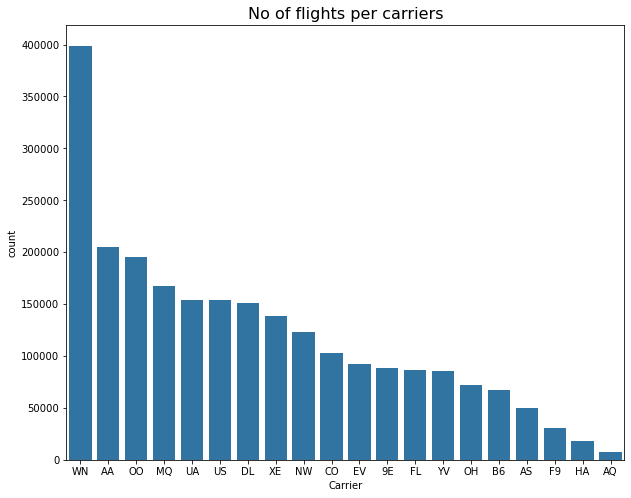

In [20]:
# store counts of filtered data in a var name

carrier = flights['UniqueCarrier'].value_counts().index

# set base color to blue

base_color = sb.color_palette()[0]

#plot chart showing total number of carriers

plt.figure(figsize=(10,8))

ax = sb.countplot(data = flights, x='UniqueCarrier', color = base_color , order = carrier)
ax.set_xlabel('Carrier')
ax.set_title('No of flights per carriers', size =16)

plt.show()


##### There are a total number of unique airlines is 20 

I also looked up the carrier codes to get the corresponding names of carriers.

- WN - Southwest Airlines

- AA - American Airlines

- 00 - Simmons Airline

- UA - United Airline

- US - US Airways

- DL - Delta Airlines

- XE - JetSuiteX

- NW - Northwest Airline

- CO - Continental Airlines

- EV - Eva Airline

- 9E - Endeavour Airline

- FL - Airtran Airways

- YV - Mesa Airlines

- OH - PSA Airlines

- B6 - Jetblue Airways

- AS -Alaska Airlines

- F9 -Frontier Airlines

- HA - Hawaiian Airlines

- AQ - Aloha Airlines


From the visualization, SouthWestern Airline (WN) had the highest number of flights and Aloha Airlines (AN) had the least number of flights.



### Which origin airport is the busiest?

In [21]:
# filter dataset to get origin and counts

airports = flights['Origin'].value_counts().rename_axis('Origin').reset_index (name = 'counts')


In [22]:
# filter dataset to get origin and counts
airports = flights['Origin'].value_counts().rename_axis('Origin').reset_index (name = 'counts')

#sort by descending order
df_airports = airports.sort_values('counts', ascending = False)

#filter the top 10 

df_airports = df_airports.head(10).set_index('Origin')

In [23]:
# choose 2nd tuple of RGB colors

base_color_bar = sb.color_palette()[1]
base_color_bar

(1.0, 0.4980392156862745, 0.054901960784313725)

In [24]:
# check for max proprtion 

n_origin = airports.shape[0]
max_count = airports['counts'][0]
max_prop = max_count/n_origin
print(max_prop)

470.8384879725086


In [25]:
# Use numpy.arange()function to produce a set of evenly spaced proportioned values 
# Between 0 and max_prop, with a step size 50%
tick_props = np.arange(0,max_prop, 50.0)

# use list comprehension to create tick names that will applt to tick labels
tick_names = ['{:0.0f}'.format(v) for v in tick_props]


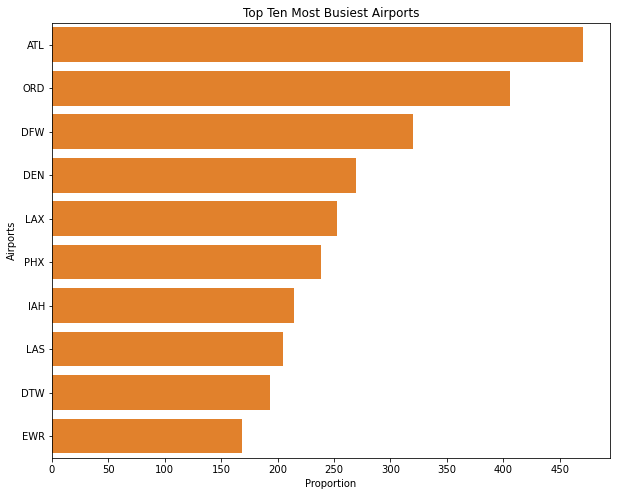

In [26]:
# Create bar visualization

plt.figure(figsize=(10,8))

ax = sb.barplot(x = 'counts' , y = df_airports.index , data = df_airports, color = base_color_bar)
ax.set_ylabel('counts')
ax.set_title('Total number of flights')
plt.xticks(tick_props* n_origin, tick_names)

ax.set_xlabel('Proportion')
ax.set_ylabel ('Airports')
plt.title ('Top Ten Most Busiest Airports')


plt.show()

The bar chart shoes Atlanta Airport(ATL) has the highest proportion of flights in USA 

### What is the distribution of  distance and airtime variables? 

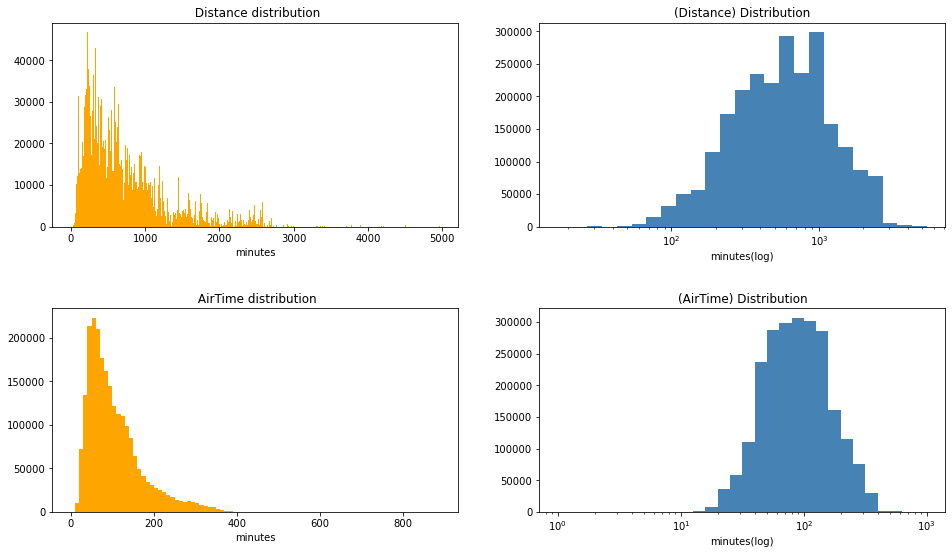

In [27]:
# create histogram
fig , ax = plt.subplots(2, 2, figsize=(16, 9))
fig.subplots_adjust(hspace=0.4)

for i, k in enumerate(['Distance', 'AirTime']):
    binsize= 10
    data = flights[flights[k]>0]
    bin_edges = np.arange(0, data[k].max()+binsize, binsize)
    ax[i, 0].hist(data[k], bins = bin_edges, color='orange')
    ax[i, 0].set_xlabel('minutes');
    ax[i, 0].set_title(f' {k} distribution');
    
    # log distribution on the right side of chart
    binsize=0.1
    bin_edges = 10 ** np.arange(np.log10(data[k].min()), np.log10(data[k].max())+binsize, binsize)
    ax[i, 1].hist(data=data, x = k, bins=bin_edges, color='steelblue')
    ax[i, 1].set_xscale('log')
    ax[i, 1].set_xlabel('minutes(log)');
    ax[i, 1].set_title(f'({k}) Distribution');

In the distance distribution i'll further like to investigatefor outliers from 3500 as those numbers look very high and could be possible outliers.

In [28]:
outliers = flights[ flights.Distance > 3500].sample(5)

outliers1 = outliers.iloc[:,[15,16,17]]

In [29]:
outliers1.sample(5)

,Origin,Dest,Distance
1054698,DFW,HNL,3784
605631,ATL,HNL,4502
1660215,ORD,HNL,4243
2004604,ORD,OGG,4184
2261662,OGG,DFW,3711


>For the possible distance outliers, i checked airports were they were associated with and found some interesting facts. Airports that had long distance seemed to originate form Hawaiian aiports either to or from. To confirm this i checked for the distance between KOA AND ORD and it was a total of 6780 kilometers which when converted to miles is about 4212.8 and others too. So i wouldn't classify them as outliers and would not be dropping them.


Source: Google

### Distribution of all delay variables

>Based on the aviation law according the the Federal Aviation Administration, a flight is considered delayed when the delay is more than 15 minutes. My focus will be on delays afer 15 minutes.

In [30]:
#query arrival delay greater than 15 mins according to FAA standard

df_delay = flights.query('ArrDelay>= 15')

In [31]:
# check descriptive statstics of numerical variable
df_delay['ArrDelay'].describe()

count    584581.000000
mean         55.906870
std          56.037304
min          15.000000
25%          23.000000
50%          36.000000
75%          68.000000
max        2461.000000
Name: ArrDelay, dtype: float64

In [32]:
# check descriptive statstics of numerical variable
df_delay['DepDelay'].describe()

count    584581.000000
mean         47.541624
std          58.025052
min         -61.000000
25%          12.000000
50%          32.000000
75%          63.000000
max        2467.000000
Name: DepDelay, dtype: float64

In [33]:
np.log10(df_delay['ArrDelay'].describe())

count    5.766845
mean     1.747465
std      1.748477
min      1.176091
25%      1.361728
50%      1.556303
75%      1.832509
max      3.391112
Name: ArrDelay, dtype: float64

In [34]:
# check log description
np.log10(df_delay['DepDelay'].describe())

C:\Users\ezeok\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.766845
mean     1.677074
std      1.763616
min           NaN
25%      1.079181
50%      1.505150
75%      1.799341
max      3.392169
Name: DepDelay, dtype: float64

C:\Users\ezeok\AppData\Local\Temp\ipykernel_8832\482503178.py:29: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax[i, 1].set_xlim(0,360)


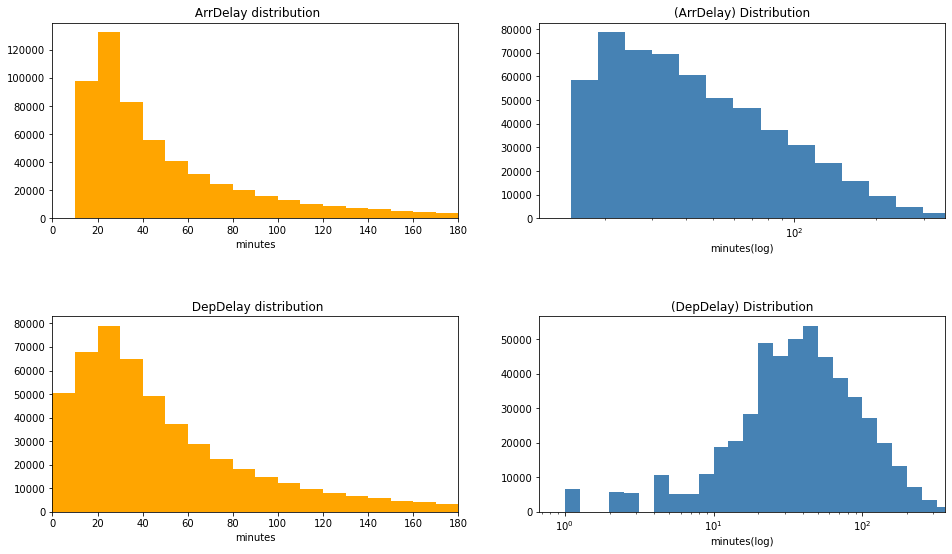

In [35]:
# Assign subplots to figure and axis variable

#two plots in one in two figures

fig, ax = plt.subplots(2, 2, figsize=(16, 9))
fig.subplots_adjust(hspace=0.5)

# create a loop 

for i, k in enumerate(['ArrDelay', 'DepDelay']):
# standard-scaled plot (left plot)
    binsize=10
    data = df_delay[df_delay[k]>0]
    
    #specify bin edges
    bin_edges = np.arange(0, data[k].max()+binsize, binsize)
    ax[i, 0].hist(data[k], bins = bin_edges, color='orange')
    ax[i, 0].set_xlabel('minutes');
    ax[i, 0].set_title(f' {k} distribution');
    ax[i, 0].set_xlim(0,180)

 # standard-scaled plot (right plot)   
    binsize=0.1
    
 #specify bin edges
    bin_edges = 10 ** np.arange(np.log10(data[k].min()), np.log10(data[k].max())+binsize, binsize)
    ax[i, 1].hist(data=data, x = k, bins=bin_edges, color='steelblue')
    ax[i, 1].set_xscale('log')
    ax[i, 1].set_xlim(0,360)
    ax[i, 1].set_xlabel('minutes(log)')
    ax[i, 1].set_title(f'({k}) Distribution')
    


<AxesSubplot:ylabel='Density'>

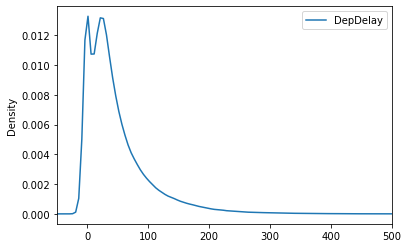

In [36]:
#density plot

df_delay.loc[:,['DepDelay']].plot.density(xlim=(-50,500))

<AxesSubplot:ylabel='Density'>

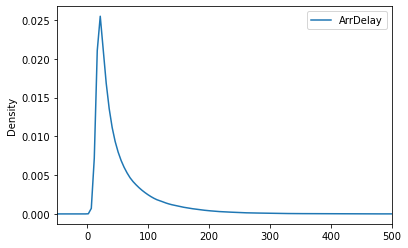

In [37]:
#density plot

df_delay.loc[:,['ArrDelay']].plot.density(xlim=(-50,500))

>From the histograms it can be deduced that both ArrDelay and DepDelay are right skewed which implies that most of the data are lower bound. This was also justified with the density plots.The log of the Deperature Delay also shows more symmetry than that of the Arrival Delay.

#### Carrier Delay, Weather Delay, NAS Delay , Security Delay and Late Aircraft Delay

C:\Users\ezeok\AppData\Local\Temp\ipykernel_8832\782343289.py:19: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax[i, 1].set_xlim(0,360)


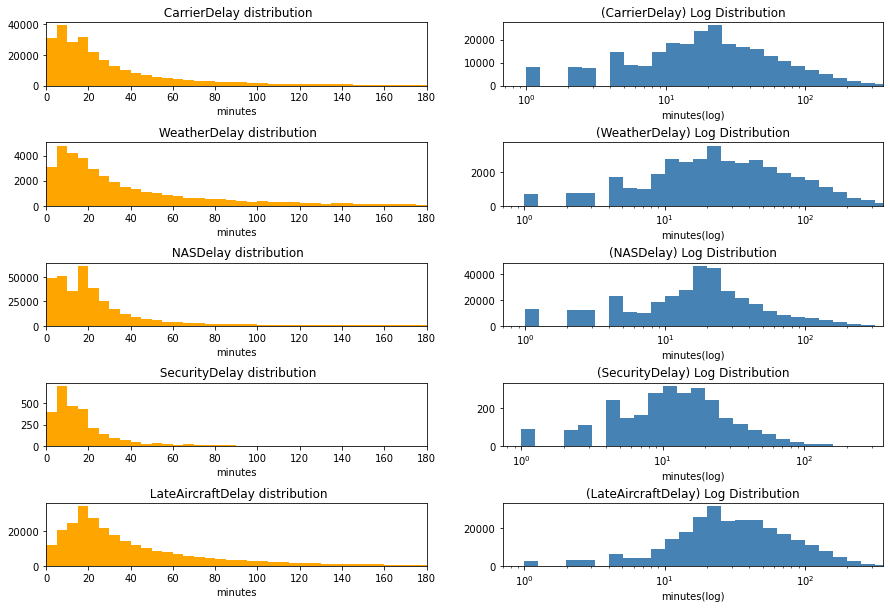

In [38]:
fig,ax = plt.subplots(5, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.9)

for i, k in enumerate(['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']):
# standard-scaled plot (on the left)
    binsize=5
    data = df_delay[df_delay[k]>0]
    bin_edges = np.arange(0, data[k].max()+binsize, binsize)
    ax[i, 0].hist(data[k], bins = bin_edges, color='orange')
    ax[i, 0].set_xlabel('minutes');
    ax[i, 0].set_title(f' {k} distribution');
    ax[i, 0].set_xlim(0,180)

 #log scale plot (on the right)
    binsize=0.1
    bin_edges = 10 ** np.arange(np.log10(data[k].min()), np.log10(data[k].max())+binsize, binsize)
    ax[i, 1].hist(data=data, x = k, bins=bin_edges, color='steelblue')
    ax[i, 1].set_xscale('log')
    ax[i, 1].set_xlim(0,360)
    ax[i, 1].set_xlabel('minutes(log)');
    ax[i, 1].set_title(f'({k}) Log Distribution');


> The shapes of the histograms all look the same. They are right skewed with long tails with expection of SecurityDAelay which has a shorter tail. It's unlikely that this delays will be correlated with one another. The Log distribution of the delays are also veriy similat to another.

### What perecentage of flights were cancelled?

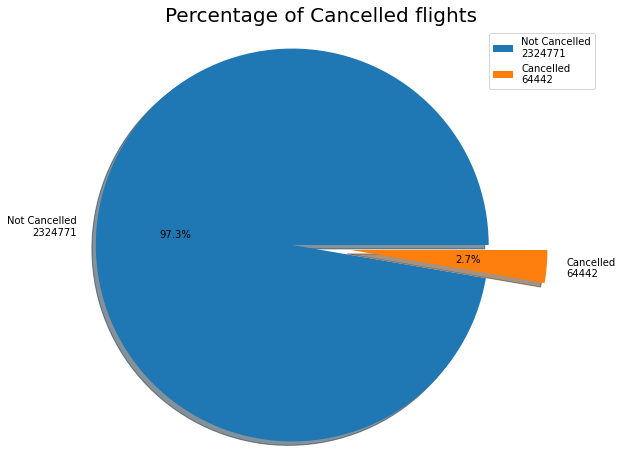

In [39]:
# Return the Series having frequency count of each unique value

df_cancelled = flights['Cancelled'].value_counts()

# plot visualization

fig =plt.figure(figsize=(10,8))
labels =f'Not Cancelled\n{df_cancelled.values[0]}', f'Cancelled\n{df_cancelled.values[1]}'
explode = (0,0.3)
plt.pie(df_cancelled, explode = explode, labels=labels, autopct='%.1f%%', shadow =True)
plt.title('Percentage of Cancelled flights', fontsize = 20)
plt.axis('equal')
plt.legend(loc ='upper right')

# Display pie chart
plt.show()


> From the Pie chart it can be seen that Only 2.7% (64442) of total flights were cancelled while 97.3% were not from the period of January to April 2008.

### What were the reasons for cancellation?

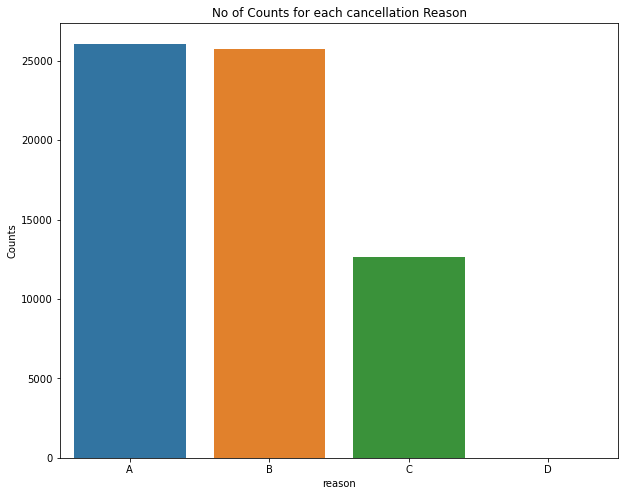

In [40]:
#bar plot

fig,ax = plt.subplots(figsize =(10,8))

df_reason = flights['CancellationCode'].value_counts().rename_axis('reason').reset_index()

df_reason.rename(columns={'CancellationCode': 'Counts'},inplace =True)

sb.barplot (data = df_reason, x ='reason', y ='Counts')

plt.title('No of Counts for each cancellation Reason')

plt.show()



>The highest number of cancellation is due to weather conditions while the least is due to security reasons.
    


### What is the average time of each delay?

In [41]:
# query all delays and get mean values

delays = df_delay[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].mean().rename_axis('Delay').reset_index(name = 'minutes')


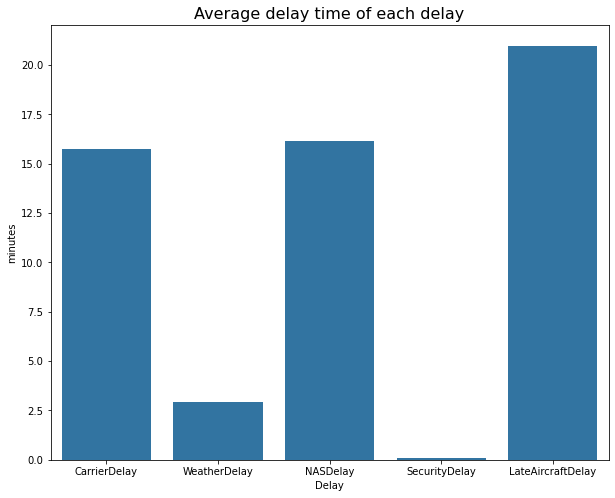

In [42]:
#bar plots

fig, ax = plt.subplots(figsize=(10,8))

sb.barplot( data = delays, x ='Delay', y = 'minutes', color = base_color)
plt.ylabel = ('Average(minutes)')
plt.xlabel = ('Delay Types')

plt.title('Average delay time of each delay', size=16)

plt.show()




>Based on the average delay time per delays , carrier delay had the highest time while security detail had the least amount of time.

### What engine types were used by the airlines?

In [43]:
# engine type value counts stored in another varable name

engine_dtype = df_delay['engine_type'].value_counts().reset_index().rename_axis()
engine_label = engine_dtype.index

In [44]:
engine_dtype.rename(columns={'index': 'engine_type','engine_type': 'counts'}, inplace =True)

Text(0.5, 1.0, 'Total number of Engine Types owned by Airlines')

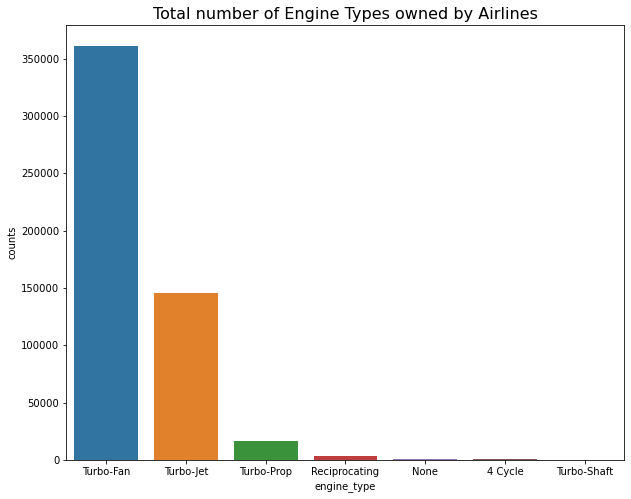

In [45]:
#bar plot

plt.figure(figsize=(10,8))
sb.barplot (data = engine_dtype, x =engine_dtype['engine_type'], y =engine_dtype['counts']);

plt.xlabel =('counts')
plt.ylabel = ('engine_type')
plt.title('Total number of Engine Types owned by Airlines', size =16)

>The total number of engine types used by the various airlines are 6 which includes( Turbo Fan, Turbo-Jet, Turbo-prop, Reciprocating index, 4 cycle and Turbo shaft. The most common engine type is the Turbo fan engine type while the Turbo shaft is the least used engine type.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>The Distance, airtime, arrival delay, and departure delay distributions were all right skewed which implies that more data were of the lower bounds.
>The Distance, Airtime, arrival, and departure delays were also transformed logarithmically to naturally reduce the dynamic range of the variables, so the differences are preserved while the scale is not that dramatically skewed.
> From the histogram the distance variable had few points after 3500 which seemed unusual and could be seen as possible outliers. Further investigation showed flights with a distance above 3500 originated from or to a particular airport location (Hawaii). To confirm this, I researched the distances between that airport and found them to be exactly as stated in the data provided. Therefore, no drop was performed.

>The percentage of canceled flights (2.7%) was just a tiny fraction when compared to the total number of flights and the major reasons for cancellation were due to carriers with the least being security.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> From the histogram, the distance variable had entries above 3500 which seemed unusual and could be seen as possible outliers. Further investigation showed flights with a distance above 3500 originated from or to a particular airport location (Hawaii). To confirm this, I researched the distances between that airport and found them to be exactly as stated in the data provided. Therefore, no drop was performed.

> I merged the 2008 data frame with the plane dataset using the tail number as I needed the engine type for my analysis.

>I saved all flights delay above 15 minutes from the original dataset in another variable for my analysis.

> Dropped all duplicates in the dataset and made a copy of the original data frame before cleaning to preserve the original dataset.

> Changed the month and day of the week to letter string format.



## C. Bivariate Exploration


>Have you ever wondered why you feel more turbulence in a plane than another? I do too so I will like to explore if the aircrafts engine types have any effect on weather and carrier delays.

In [46]:
engine = df_delay.groupby('engine_type')[['CarrierDelay', 'WeatherDelay']].sum()

In [47]:
# choose 2nd tuple of RGB colors

base_color3 = sb.color_palette()[1]
base_color3

(1.0, 0.4980392156862745, 0.054901960784313725)

In [48]:
# choose 1st tuple of RGB colors

base_color2 = sb.color_palette()[0]
base_color2

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

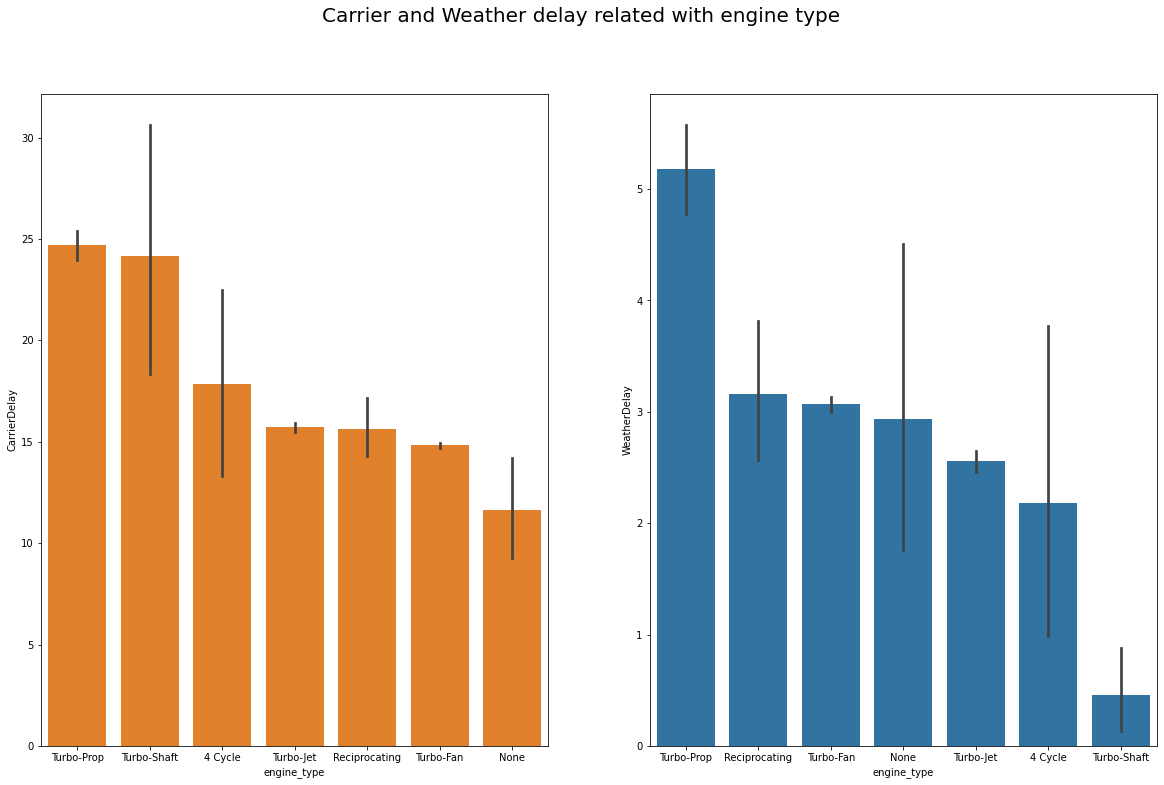

In [49]:
#plot bar plot

fig,ax = plt.subplots(1,2 , figsize=(20,12))

engine_carrier = df_delay.groupby('engine_type')['CarrierDelay'].mean().sort_values(ascending=False).index
engine_weather = df_delay.groupby('engine_type')['WeatherDelay'].mean().sort_values(ascending=False).index
sb.barplot(data = df_delay, x ='engine_type', y=df_delay['CarrierDelay'], color = base_color3, order = engine_carrier, ax=ax[0]);
sb.barplot(data = df_delay, x ='engine_type', y=df_delay['WeatherDelay'], color = base_color2, order = engine_weather, ax=ax[1])

fig.suptitle('Carrier and Weather delay related with engine type', size =20);
plt.show()


>The plot of the Carrier and Weather delay by engine type shows the  Turbo-Prop engine type is more prone to such delays. Interesting to Know!

### Carriers and Engine types

>Futhermore i would like to dig deeper on the types and quantity of engine_types owned by each of the carriers. This can provide more insights on why some carriers experience a type of delay than others.

In [50]:
df_engine = df_delay.groupby(['UniqueCarrier', 'engine_type']).size().reset_index(name ='count')

In [51]:
#create pivot 

df_engine =df_engine.pivot(index ='UniqueCarrier', columns ='engine_type', values ='count')

Text(0.5, 1.0, 'Engine types per carrier')

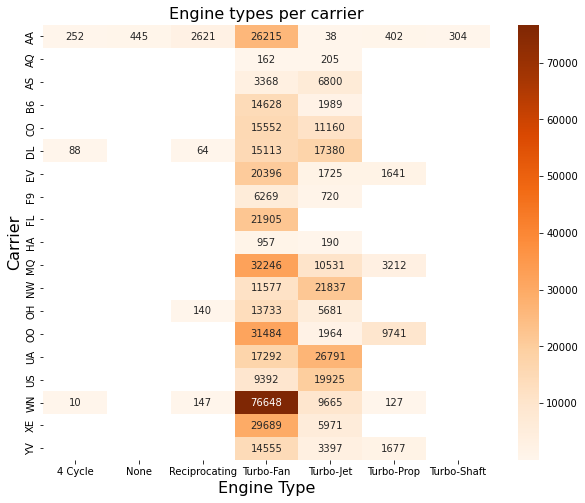

In [52]:
#plot heat map

fig,ax = plt.subplots(figsize =(10,8))

sb.heatmap(df_engine, annot =True, fmt ='.0f', cmap ='Oranges',ax=ax)
ax.set_xlabel('Engine Type', size=(16))
ax.set_ylabel('Carrier', size=(16))
plt.title( 'Engine types per carrier', size = 16)

>The heatmap  visualization shows that most airlines invest in the Turbo -Fan and Turbo-Jet engine types and less of the Turbo-prop, Turbo-shaft, 4cycle and reciprocating and from our previous analysis Turbo shaft was the highest engine type with carrier and weather delays.


### What is the average delay for each delay type by airlines?

>Now let's have a closer look at the proprtion of delay for each unique carrier.

In [53]:
# melt all delay columns to one coloumn

all_delays = pd.melt(df_delay, id_vars = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime','ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum','ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
'DepDelay', 'Origin', 'Dest', 'Distance', 'Cancelled','CancellationCode', 'engine_type'], value_vars=['CarrierDelay', 'WeatherDelay',
'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], var_name = 'Delay_type', value_name ='Delay')

all_delays['Delay_type'] = all_delays['Delay_type'].str[:-5]

all_delays =all_delays[all_delays.Delay>0]

In [54]:
#confirm data information

all_delays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 923977 entries, 0 to 2922901
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               923977 non-null  int64  
 1   Month              923977 non-null  object 
 2   DayofMonth         923977 non-null  int64  
 3   DayOfWeek          923977 non-null  object 
 4   DepTime            923977 non-null  float64
 5   CRSDepTime         923977 non-null  int64  
 6   ArrTime            923977 non-null  float64
 7   CRSArrTime         923977 non-null  int64  
 8   UniqueCarrier      923977 non-null  object 
 9   FlightNum          923977 non-null  int64  
 10  ActualElapsedTime  923977 non-null  float64
 11  CRSElapsedTime     923977 non-null  float64
 12  AirTime            923977 non-null  float64
 13  ArrDelay           923977 non-null  float64
 14  DepDelay           923977 non-null  float64
 15  Origin             923977 non-null  object 
 16  D

In [55]:
all_delays['Delay_type'].value_counts()

NAS             349647
LateAircraft    275249
Carrier         258683
Weather          37650
Security          2748
Name: Delay_type, dtype: int64

In [56]:
all_delays.sample(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,engine_type,Delay_type,Delay
1728299,2008,Apr,3,Thurs,1756.0,1735,2038.0,2000,AA,1136,...,38.0,21.0,MIA,DCA,920,0,NaN,NaN,NAS,17.0
1571865,2008,Mar,29,Sat,917.0,900,1003.0,945,MQ,3945,...,18.0,17.0,ORD,BMI,116,0,NaN,Turbo-Fan,NAS,1.0


Text(0.5, 1.0, 'Delays by Airlines')

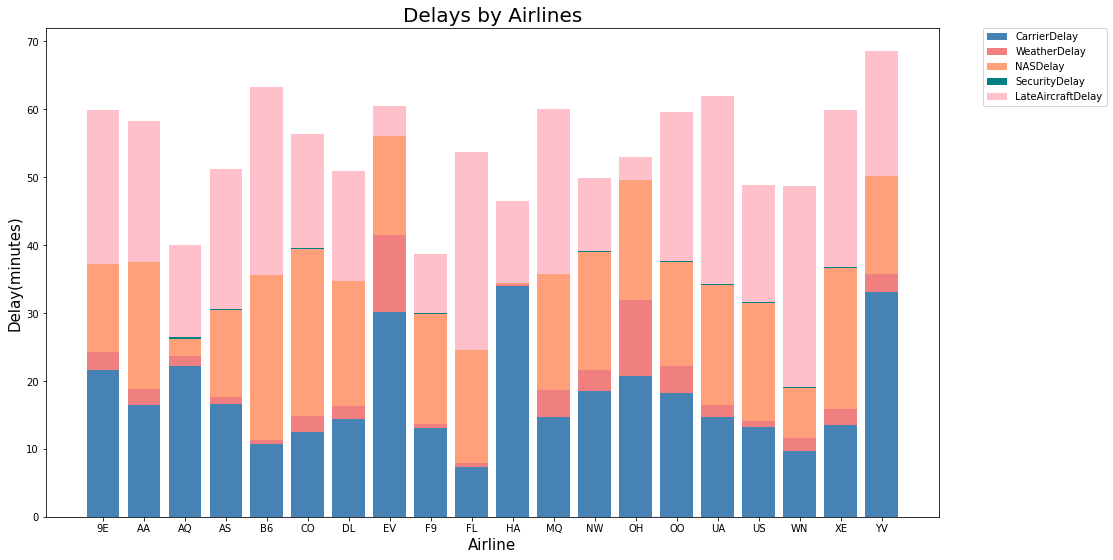

In [57]:
# stacked bar chart

stacked_bar = df_delay.groupby('UniqueCarrier')[['CarrierDelay', 'WeatherDelay',
'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].mean()

color = ['mediumpurple', 'mocassin', 'lightsalmon', 'skyblue', 'aquamarine']

fig,ax = plt.subplots(figsize =(16,9))

ax.bar(stacked_bar.index, stacked_bar['CarrierDelay'], label='CarrierDelay', color = 'steelblue')
ax.bar(stacked_bar.index, stacked_bar['WeatherDelay'], bottom = stacked_bar['CarrierDelay'], label ='WeatherDelay', color = 'lightcoral')
ax.bar(stacked_bar.index, stacked_bar['NASDelay'], bottom = stacked_bar['CarrierDelay'] + stacked_bar['WeatherDelay'], label = 'NASDelay', color = 'lightsalmon')
ax.bar(stacked_bar.index, stacked_bar['SecurityDelay'], bottom = stacked_bar['CarrierDelay'] + stacked_bar['WeatherDelay'] + stacked_bar['NASDelay'], label = 'SecurityDelay' , color = 'teal' )
ax.bar(stacked_bar.index, stacked_bar['LateAircraftDelay'], bottom = stacked_bar['CarrierDelay'] + stacked_bar['WeatherDelay'] + stacked_bar['NASDelay'] + stacked_bar['SecurityDelay'], label = 'LateAircraftDelay', color = 'pink')
ax.legend(bbox_to_anchor= (1.05, 1), loc='upper left', borderaxespad=0) 

ax.set_xlabel('Airline', size =15)
ax.set_ylabel('Delay(minutes)',size =15)
plt.title('Delays by Airlines', size =20)



>The stacked bar chart shows the causes of delay of each unique carrier. Based on our previous findings we can see that carriers with high carrier delays tends to have little number of flights or have some of turbo prop engines in their fleet from the heat map. This can be seen for HA,EV,YV and AQ carriers.

>FL which had the lowest number of Carrier delay has only the Turbo fan engine type and based on our previous analysis of engine types aganist carrier delays shows that the Turbo fan engine tyoes had the lowest delay in relation with the Carrier.

### what is the Correlation between Airtime, Distance and Delay types?

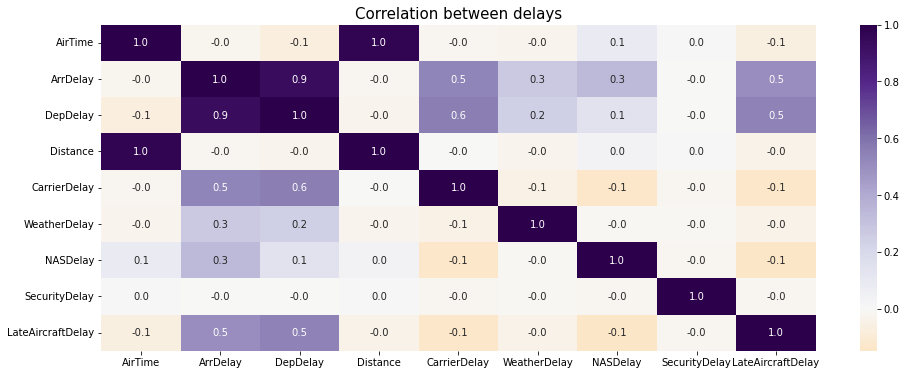

In [58]:
plt.figure(figsize=(16, 6))
sb.heatmap(df_delay[['AirTime','ArrDelay', 'DepDelay','Distance','CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].corr(), annot=True, fmt='.1f', cmap='PuOr', center=0);
plt.title('Correlation between delays', size=15);

> Using the following rule of thumb for judging correlation strength in my heatmap

>- 0.7≤∣r∣≤1.0  - Strong

>- 0.3≤∣r∣ < 0.7  - Moderate

>- 0.0≤∣r∣<0.3 - Weak

> r in this case will stand as the values on the heatmap and the darker colours shows strong correlations.

>From the Heatmap the strongest correlations were seen between 1) Distance and Airtime 2) DepDelay and ArrDelay

>Weak correlations were seen in Airtime and DepDelay, between delays(Carrier, Weather, NAS, Security and LateAircraft)





In [59]:
# use the Iloc to drop unwanted columns 

df_pair = df_delay.iloc [:,[6,12,13,14,17,20,21,22,23,24]]


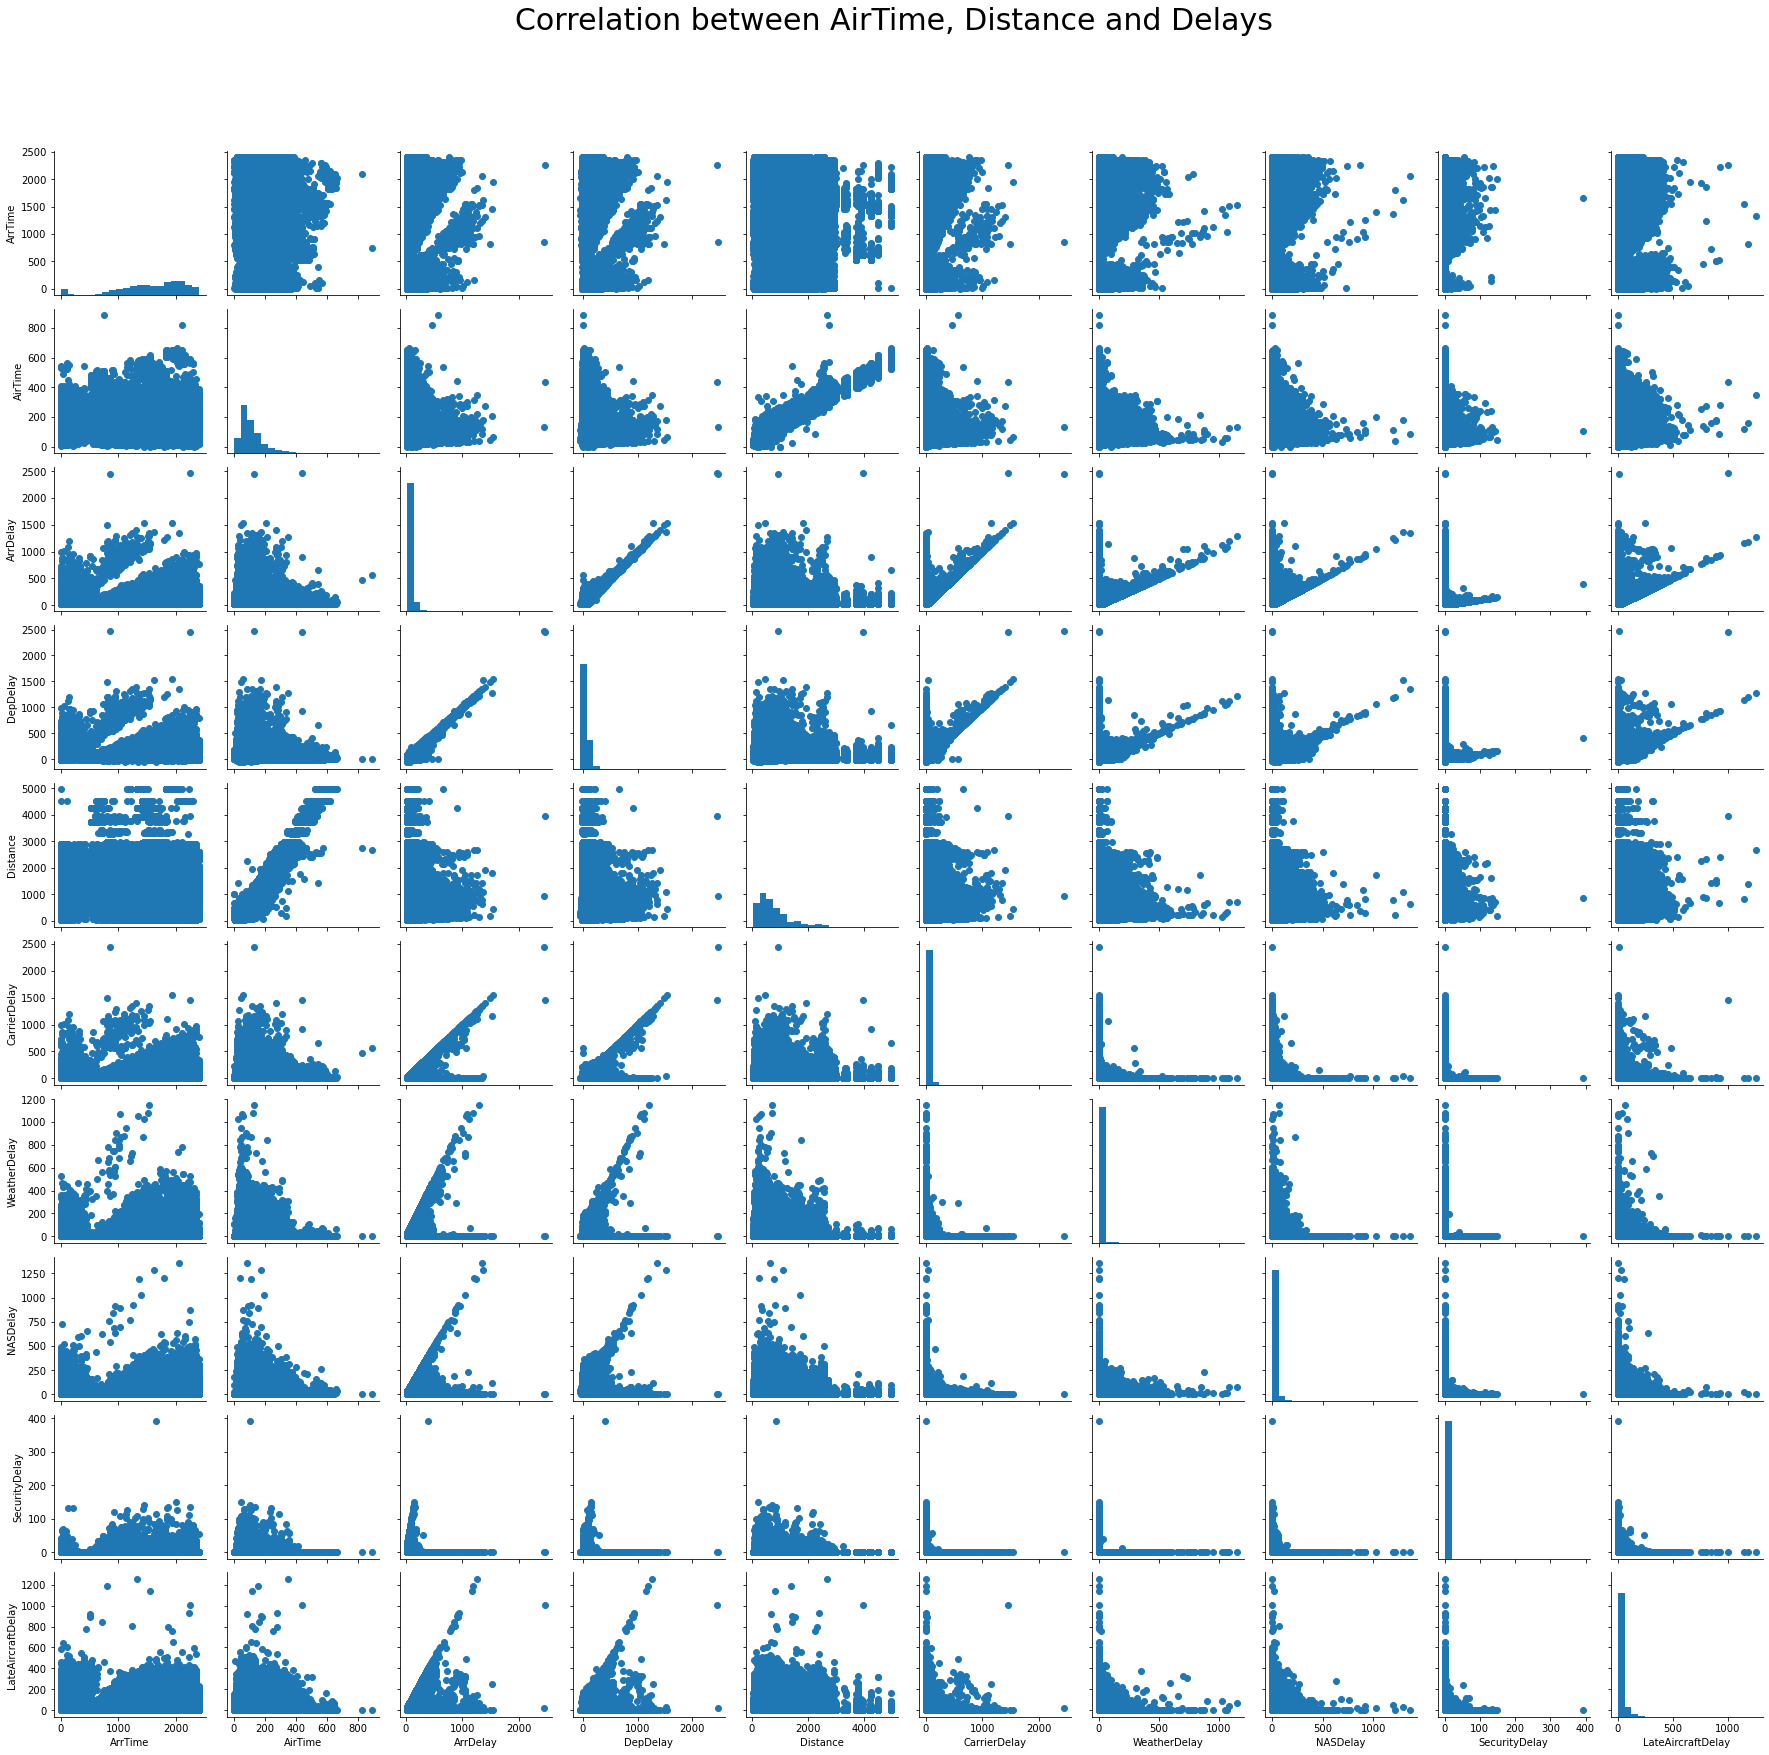

In [60]:
#plot matrix of numeric variables

g = sb.PairGrid(data=df_pair, vars=['ArrTime', 'AirTime','ArrDelay', 'DepDelay','Distance','CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']);
g = g.map_diag(plt.hist, bins=20);
g.map_offdiag(plt.scatter);
plt.subplots_adjust(top=0.9)
plt.suptitle('Correlation between AirTime, Distance and Delays', size=30);

>This scatter plot pair grid visual shows a more clearer picture of the correlation between variables plotted on the heat map.


## Whic delay type accounted for the highest and least arrival delay?

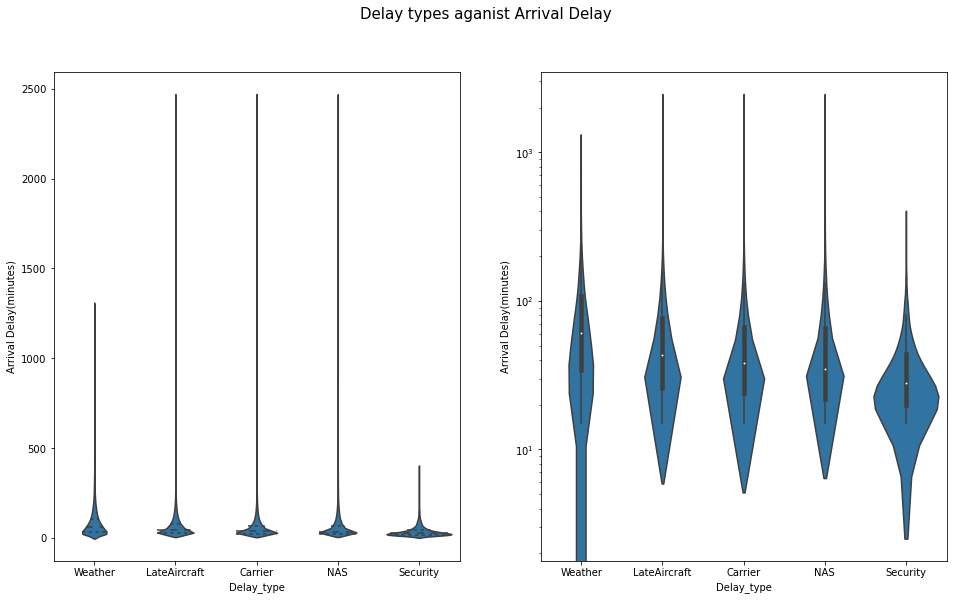

In [61]:
# violin plot

fig,ax = plt.subplots(1,2,figsize=(16,9))

order1 = all_delays.groupby('Delay_type')['ArrDelay'].mean().sort_values(ascending = False).index
sb.violinplot(data = all_delays, x='Delay_type', y = 'ArrDelay', order = order1, color = base_color,inner='quartile', ax =ax[0])
sb.violinplot(data = all_delays, x='Delay_type', y = 'ArrDelay', order = order1, color = base_color, ax=ax[1])
ax[1].set_yscale('log')

plt.suptitle('Delay types aganist Arrival Delay', size=15);
ax[1].set_ylabel('Arrival Delay(minutes)')
ax[0].set_ylabel('Arrival Delay(minutes)')

plt.show()


>Weather Delay had the highest cause of Arrival Delays with security delay being the least.

### What  Month or day of the week experienced the most weather delays ?

In [62]:
#group mean value of delays by months
weather_month = df_delay.groupby('Month')[['ArrDelay','DepDelay','WeatherDelay', 'CarrierDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].mean().reset_index()
#sort Months
weather_month['Month'] =pd.Categorical(weather_month['Month'],['Jan', 'Feb', 'Mar','Apr'])
weather_month.sort_values('Month', inplace =True)

In [63]:
#group mean value of delays by months
weather_week = df_delay.groupby('DayOfWeek')[['ArrDelay','DepDelay','WeatherDelay', 'CarrierDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].mean().reset_index()
weather_week['DayOfWeek'] =pd.Categorical(weather_week['DayOfWeek'],['Mon', 'Tue', 'Wed','Thurs', 'Fri', 'Sat', 'Sun'])
weather_week.sort_values('DayOfWeek', inplace =True)

In [64]:
#group mean value of delays by months

day_month = df_delay.groupby('DayofMonth')[['ArrDelay','DepDelay','WeatherDelay', 'CarrierDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].mean().reset_index()
#weather_week['DayOfWeek'] =pd.Categorical(weather_week['DayOfWeek'],['Mon', 'Tue', 'Wed','Thurs', 'Fri', 'Sat', 'Sun'])
day_month.sort_values('DayofMonth', inplace =True)

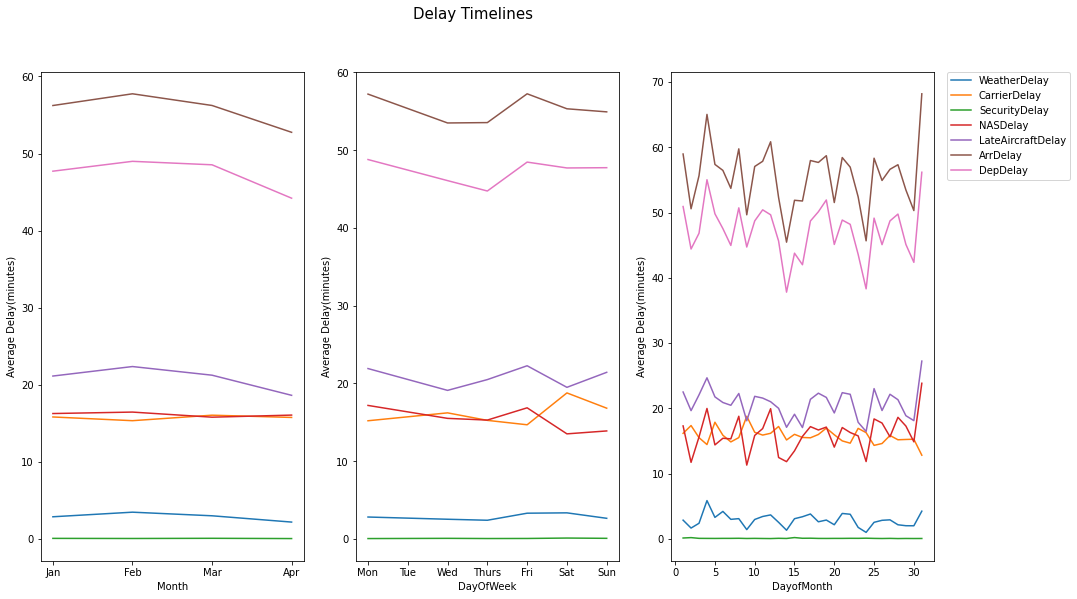

In [65]:
#line plot


fig,ax = plt.subplots(1,3,figsize=(16,9))

sb.lineplot(data = weather_month, x= 'Month', y= 'WeatherDelay', ax=ax[0])
sb.lineplot(data = weather_month, x= 'Month', y= 'CarrierDelay', ax=ax[0])
sb.lineplot(data = weather_month, x= 'Month', y= 'SecurityDelay', ax=ax[0])
sb.lineplot(data = weather_month, x= 'Month', y= 'NASDelay', ax=ax[0])
sb.lineplot(data = weather_month, x= 'Month', y= 'LateAircraftDelay', ax=ax[0])
sb.lineplot(data = weather_month, x= 'Month', y= 'ArrDelay', ax=ax[0])
sb.lineplot(data = weather_month, x= 'Month', y= 'DepDelay', ax=ax[0])

sb.lineplot(data = weather_week, x= 'DayOfWeek', y= 'WeatherDelay', ax=ax[1])
sb.lineplot(data = weather_week, x= 'DayOfWeek', y= 'CarrierDelay', ax=ax[1])
sb.lineplot(data = weather_week, x= 'DayOfWeek', y= 'SecurityDelay', ax=ax[1])
sb.lineplot(data = weather_week, x= 'DayOfWeek', y= 'NASDelay', ax=ax[1])
sb.lineplot(data = weather_week, x= 'DayOfWeek', y= 'LateAircraftDelay', ax=ax[1])
sb.lineplot(data = weather_week, x= 'DayOfWeek', y= 'ArrDelay', ax=ax[1])
sb.lineplot(data = weather_week, x= 'DayOfWeek', y= 'DepDelay', ax=ax[1])


sb.lineplot(data = day_month, x= 'DayofMonth', y= 'WeatherDelay', ax=ax[2])
sb.lineplot(data = day_month, x= 'DayofMonth', y= 'CarrierDelay', ax=ax[2])
sb.lineplot(data = day_month, x= 'DayofMonth', y= 'SecurityDelay', ax=ax[2])
sb.lineplot(data = day_month, x= 'DayofMonth', y= 'NASDelay', ax=ax[2])
sb.lineplot(data = day_month, x= 'DayofMonth', y= 'LateAircraftDelay', ax=ax[2])
sb.lineplot(data = day_month, x= 'DayofMonth', y= 'ArrDelay', ax=ax[2])
sb.lineplot(data = day_month, x= 'DayofMonth', y= 'DepDelay', ax=ax[2])

ax[0].set_ylabel('Average Delay(minutes)')
ax[1].set_ylabel('Average Delay(minutes)')
ax[2].set_ylabel('Average Delay(minutes)')

plt.suptitle('Delay Timelines', size=15);
plt.legend(labels = ['WeatherDelay', 'CarrierDelay','SecurityDelay', 'NASDelay', 'LateAircraftDelay', 'ArrDelay', 'DepDelay'],bbox_to_anchor= (1.05, 1), loc='best', borderaxespad=0) 
plt.show()

>Security delays shows little or no change.
Weather experienced a spike in the Month of February and on weekday Friday.
Arrival delay and departure delays experienced spikes on Fridays and also in the month of February.
More delays were encountered within day 3 to 5 of the month.

#### A closer look at Weather Delay

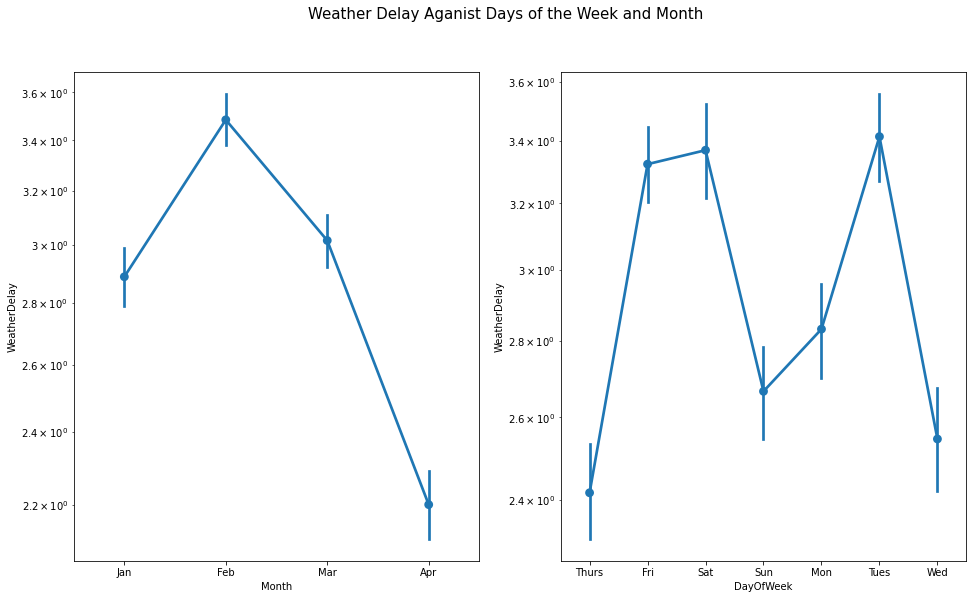

In [66]:
#point plot

fig,ax = plt.subplots(1,2, figsize=(16,9))

sb.pointplot(data = df_delay, x = 'Month', y='WeatherDelay',ax=ax[0])
sb.pointplot(data = df_delay, x= 'DayOfWeek', y = 'WeatherDelay', ax =ax[1])
ax[0].set_yscale('log')
ax[1].set_yscale('log')
plt.suptitle('Weather Delay Aganist Days of the Week and Month', size=15);

plt.show()

>Average Weather Delay in February seems to be higher that other months in the dataset provided for 2008. The month of February falls under the winter period in the USA. Could this be attributed to why most delays are caused in february and January?

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Airtime and Distance had a strong positive correlation that is to say the longer the distance the more the airtime and vice versa.
Departure delay and Arrival delay also had a positive correlation and i believe this makes a lot of sense due to the fact that when an aircraft is delayed at the origin airport there's a high tendency of arriving late at the destination airport.
 
 > Weather delays topped the charts of the causes of delay in the USA in the year 2008.The average weather delay was the highest when compared to other months. In the USA february falls in winter and could this be a factor to consider? 
 
>The delays types security, LateAircraft, NAS and Carrier based on my analysis experienced spikes on the day of the week Friday.it was also deduced the major cause of arrival delay is due to the weather.
 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The engine type of the aircraft can have an effect on weather and carrier delay.The Turbo Prop engine type experienced more carrier delays and weather delays than the other engine types.
  
>Airlines with high average carrier delays tends to have little number of flights or have some turbo prop engines in their fleet. This can be seen in cases of the HA ,EV, YV and AQ carriers.Also FL which had the lowest number of carrier delay had only the Turbo fan engine type and based on our previous analysis of engine types aganist carrier delays this shows that the Turbo fan engine type had the lowest cause of carrier delay.
  

## D. Multivariate Exploration


### Is there a relationship between delay and arrival delay per carrier(airline)? Let's find out!

In [67]:
#order = all_delays.groupby('Delay_type')['Delay'].mean().sort_values(ascending = False).index
#order

C:\Users\ezeok\anaconda\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


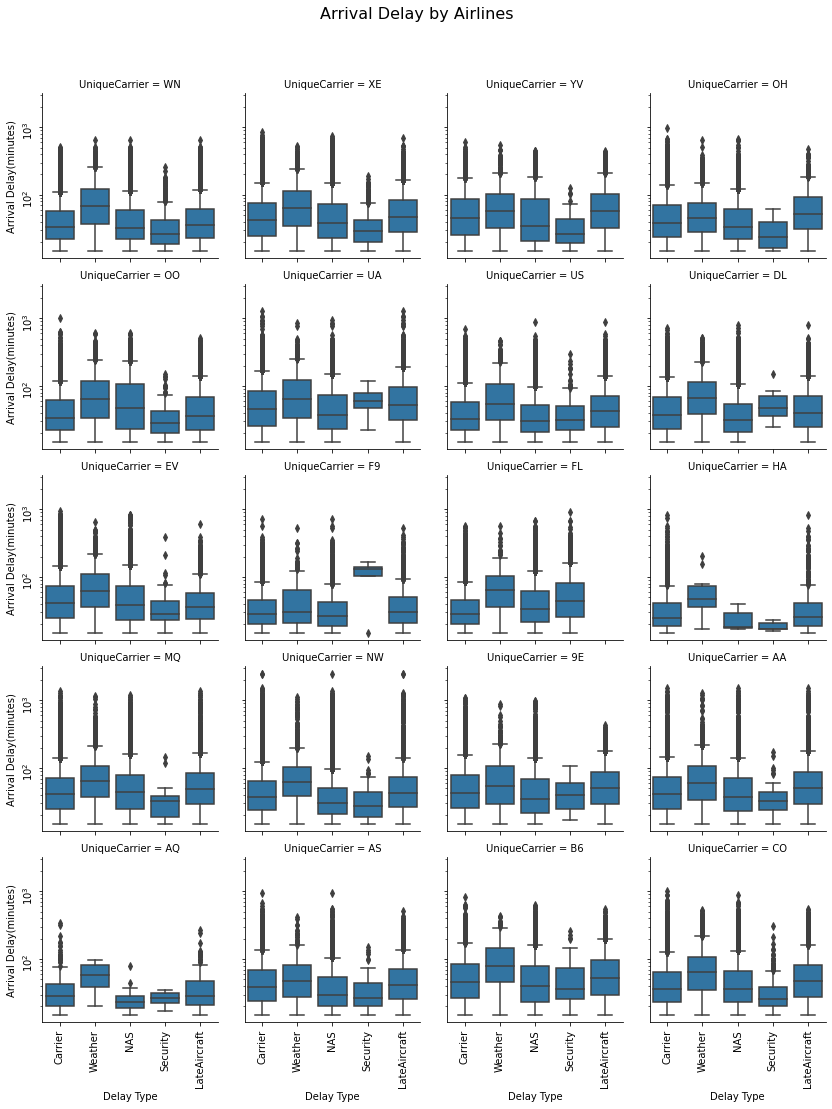

In [68]:
g = sb.FacetGrid(data=all_delays, col='UniqueCarrier', col_wrap=4)
g.map(sb.boxplot, 'Delay_type', 'ArrDelay')
plt.yscale('log');
plt.subplots_adjust(top=0.9)
plt.suptitle('Arrival Delay by Airlines', size=16);

# set_facet_title()

# # Set axes and tick labels
axes = g.axes.flat

for ax in axes:
    ax.tick_params(rotation=90)
    ax.set_xlabel('Delay Type')
    ax.set_ylabel('Arrival Delay(minutes)')
    
plt.show()

>It looks like the weather caused the most delays for most airlines while the security delay was the least. That is to security breaches in the airport are quite minimal when compared with weather conditions which the carriers have no power over.

### What is the relationship between arrival delay and distance for each unique carrier?

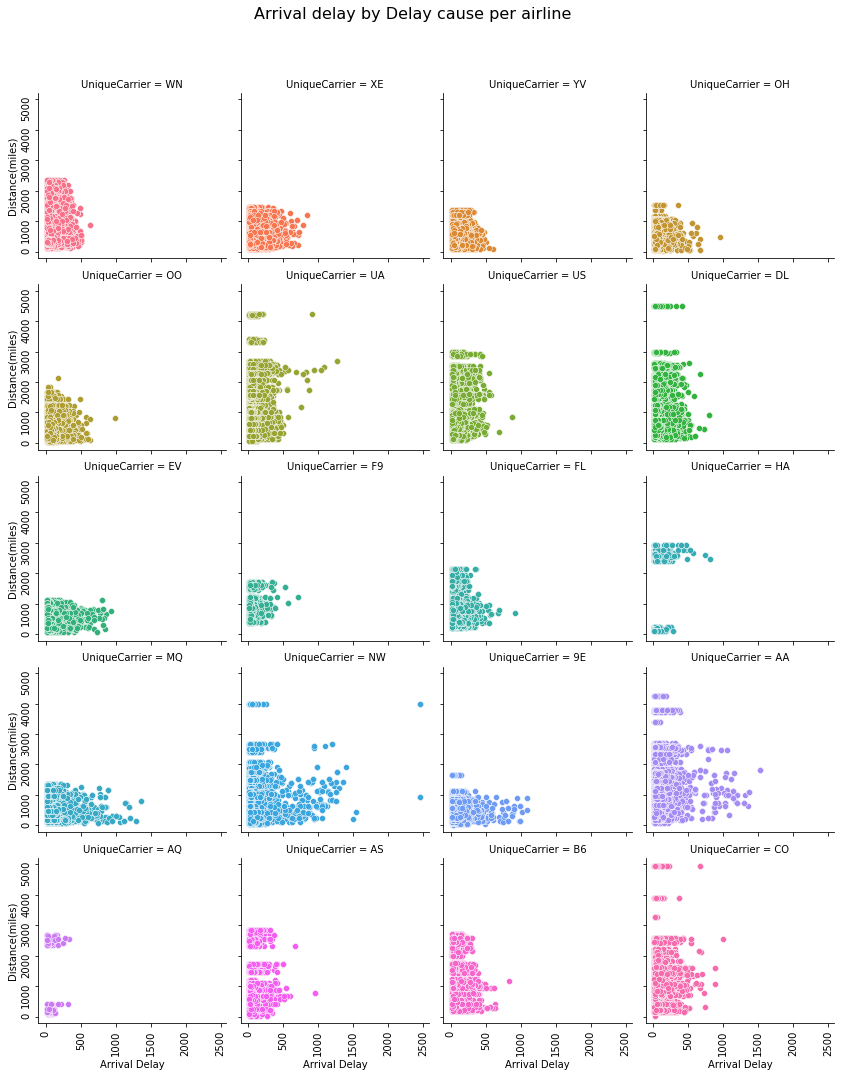

In [69]:
#scatter plot

g = sb.FacetGrid(data=all_delays, col='UniqueCarrier',hue='UniqueCarrier', col_wrap=4)
g.map(sb.scatterplot, 'ArrDelay', 'Distance')
#plt.yscale('log');
plt.subplots_adjust(top=0.9)
plt.suptitle('Arrival delay by Delay cause per airline', size=16);

# set_facet_title()

# # Set axes and tick labels
axes = g.axes.flat

for ax in axes:
    ax.tick_params(rotation=90)
    ax.set_xlabel('Arrival Delay')
    ax.set_ylabel('Distance(miles)')

>There are no correlation between arrival delay and distance. Therefore we can't say aircrafts get delayed due to longer or shorter distance.

### what is the average delay caused by each delay types for all engine types?

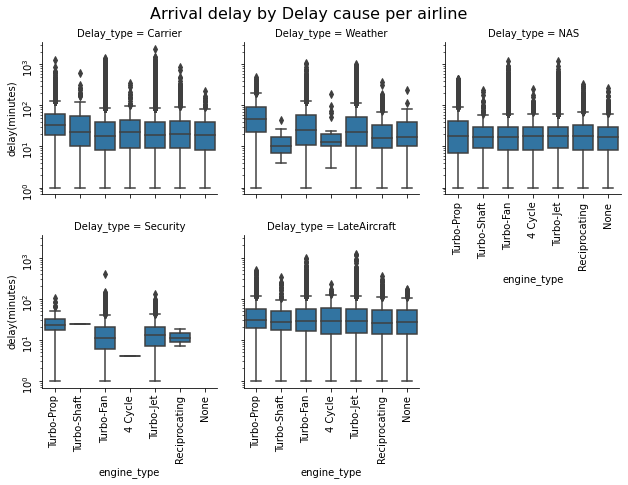

In [70]:
orders = all_delays.groupby('engine_type')['Delay'].mean().sort_values(ascending = False).index

g = sb.FacetGrid(data=all_delays, col='Delay_type', col_wrap=3)
g.map(sb.boxplot, 'engine_type', 'Delay', order =orders)
plt.yscale('log');
plt.subplots_adjust(top=0.9)
plt.suptitle('Arrival delay by Delay cause per airline', size=16);

# set_facet_title()

# # Set axes and tick labels
axes = g.axes.flat

for ax in axes:
    ax.tick_params(rotation=90)
    ax.set_xlabel('engine_type')
    ax.set_ylabel('delay(minutes)')

>This plot further puts further re instates my my analysis where Turbo-Prop engine had the highest avarage delay for carrier and weather delay .Other delays such as NAS, security and LateAircraft had Turbo-Prop engine as the top engine with the highest average mean delay.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>Bad Weather was the most cause of delays while security had the lowest cause of delay.
Turbo prop engine types seems to influence delays than other engine types. Also it was seen that distance and arrival delays had no correlation.

### Were there any interesting or surprising interactions between features?

>I also found that other delays such as NAS, security and LateAircraft had Turbo-Prop engine as the engine_type with the highest average mean delay.


## E. Conclusions

>The flights datasets was interesting to analyze and my exploartion which started with the univariate anlaysis  gave more insights about variables and the normal scale and log distribution of some. Furthemore I carried out a bivariate and multivariate exploration on important features needed for my investigation after which all findings were documented at the end of each exploration phase.


## Resources

[Search](https://www.ncei.noaa.gov/access/monitoring/monthly-report/national/200802.)

[Repository 1](https://notebooks.githubusercontent.com/view/ipynb?azure_maps_enabled=true&browser=unknown_browser&color_mode=auto&commit=6979c7d91fa11482e44ec006d9cea0380c9048f9&device=unknown_device&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6b486172736869742f756461636974792d6e616e6f6465677265652d70726f6a656374732f363937396337643931666131313438326534346563303036643963656130333830633930343866392f44414e445f646174615f616e616c7973745f6e616e6f6465677265652f70355f636f6d6d756e69636174655f646174615f66696e64696e67732f6578706c6f726174696f6e2e6970796e62&logged_in=false&nwo=kHarshit%2Fudacity-nanodegree-projects&path=DAND_data_analyst_nanodegree%2Fp5_communicate_data_findings%2Fexploration.ipynb&platform=unknown_platform&repository_id=162798274&repository_type=Repository&version=0)

[Repository 2](https://github.com/kudojp/FlightsDataAnalysis/blob/master/flightsdata_exploration.ipynb)

[Matplotlib legend loc](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)

[Matplotlib color](https://matplotlib.org/stable/gallery/color/named_colors.html)

[Log distribution](https://datascience.stackexchange.com/questions/40089/what-is-the-reason-behind-taking-log-transformation-of-few-continuous-variables)

[stackoverflow](https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name)

[GeekforGeeks]

[Matplotlib](https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/)

Panda Documentation[]








